In [859]:
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)


## Reading the Data

In [860]:
df:DataFrame = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [861]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # buliding the model
# model  = LogisticRegression()
# model.fit(X_train,y_train)
df.shape

(891, 12)

In [862]:
#check the data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [863]:
# view statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [864]:
# get the number of missing values per column
miss_values_count = df.isnull().sum()

miss_values_count.sort_index

<bound method Series.sort_index of PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64>

From the data we see that columns 'Age' and 'Cabin' both have missing values. A heap map would clarify whereabouts of the missing data

<AxesSubplot:>

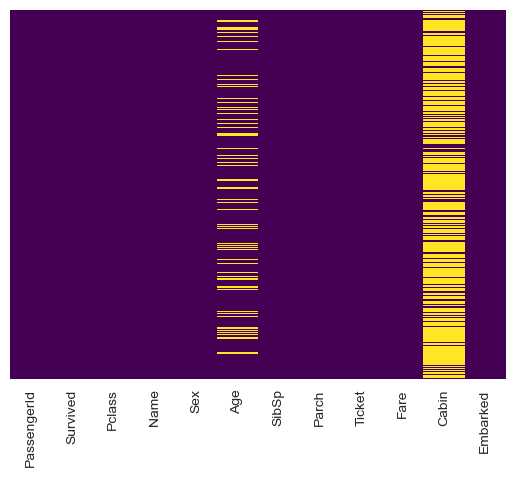

In [865]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [866]:
# counting missing values
missing_values_cnt  = df.isnull().sum().sum()
missing_values_cnt

866

In [867]:
#counting total cells
total_cells = np.product(df.shape)
total_cells

10692

In [868]:
df.shape

(891, 12)

In [869]:
# Percentange of missing values
percentange_missing = round(missing_values_cnt/total_cells * 100)
print("Percentae of missing values in the dataset : {}%" .format(percentange_missing))

Percentae of missing values in the dataset : 8%


Percentage of missing values in the dataset is 8%
- The missing percentage is too high to ignore, we should try to impute some values that are significant for to our investigation
- We can see from the heatmap above that `Cabin` has a very large number of null values. However, it is irrelevant to our investigation. Hence, we will patiently drop the Column

In [870]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Though the columns 'Ticket', 'PassngerId' and 'Name' don't have null values they are significant to investigation regarding features affecting survival thus we drop them

In [871]:
df.drop(['Ticket','PassengerId','Name'], axis=1, inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


There are a moderate number of missing values in 'Age' column

In [872]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [873]:
# we can compute the missing values by replacing them with the mean age.
mean_age  = df['Age'].mean()
df['Age']= df['Age'].replace(np.nan,mean_age)
df['Age'].unique()


array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


As there are only two values missing from 'Embarked' and these are Categorial we can drop these two rows from the dataset without affecting the investigation.

In [875]:
df[df.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


- We the 2 columns having missing values and we drop them

In [876]:
df.drop([61,829], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [877]:
# get the number of missing values per column
miss_values_count = df.isnull().sum()

miss_values_count[:,]

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Classifying Gender

In [878]:
df['Sex'].replace(['male','female'],[1,0], inplace=True)

In [879]:
df['Sex'].value_counts().values

array([577, 312])

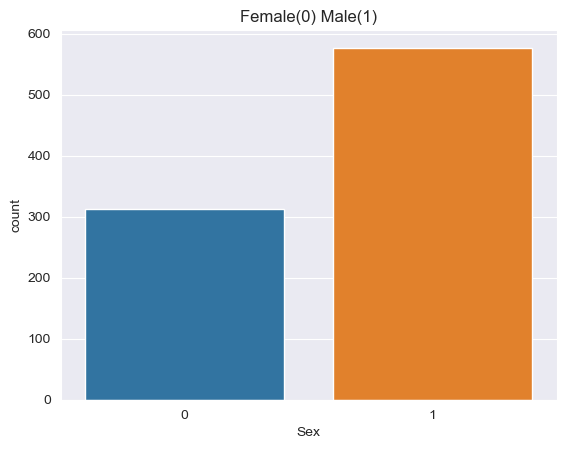

In [880]:
# plot the chart to visualise

sns.countplot(x=df['Sex'])
plt.title("Female(0) Male(1)")
plt.show()

# Classifying Embarked

In [881]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [882]:
df['Embarked'].replace(['S','C','Q'],[0,1,3], inplace=True)

# Change Dtype to category for 'Sex' and 'Embarked'
df[['Embarked','Sex']] = df[['Embarked','Sex']].astype('category')

df['Embarked'].unique()


[0, 1, 3]
Categories (3, int64): [0, 1, 3]

In [883]:
df['Sex'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [884]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 50.6 KB


In [885]:
# Change the Dtype
df[['Age','Fare']]= df[['Sex','Fare']].apply(np.int64)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    int64   
 1   Pclass    889 non-null    int64   
 2   Sex       889 non-null    category
 3   Age       889 non-null    int64   
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    int64   
 7   Embarked  889 non-null    category
dtypes: category(2), int64(6)
memory usage: 50.6 KB


# Machine Learning

In [886]:
# Independent Variable

X = df.iloc[:,[1,2,3,4,5,6,7]]
y =df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Training Set and Test Set

In [887]:
r = 4
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=4)
print(f'training set {X_train.shape} {y_train.shape}')
print(f'test set {X_test.shape} {y_test.shape}')

training set (666, 7) (666,)
test set (223, 7) (223,)


In [888]:
# split into training and test set
X_train, X_dev, y_train, y_dev, = train_test_split(X_train,
                                                   y_train, test_size=0.2, random_state=0)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_dev.shape, y_dev.shape)

Training data: (532, 7) (532,)
Test data: (134, 7) (134,)


# Fitting a Decision Tree

In [889]:
unpruned = DecisionTreeClassifier(max_depth=None,random_state=4)
unpruned.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4)

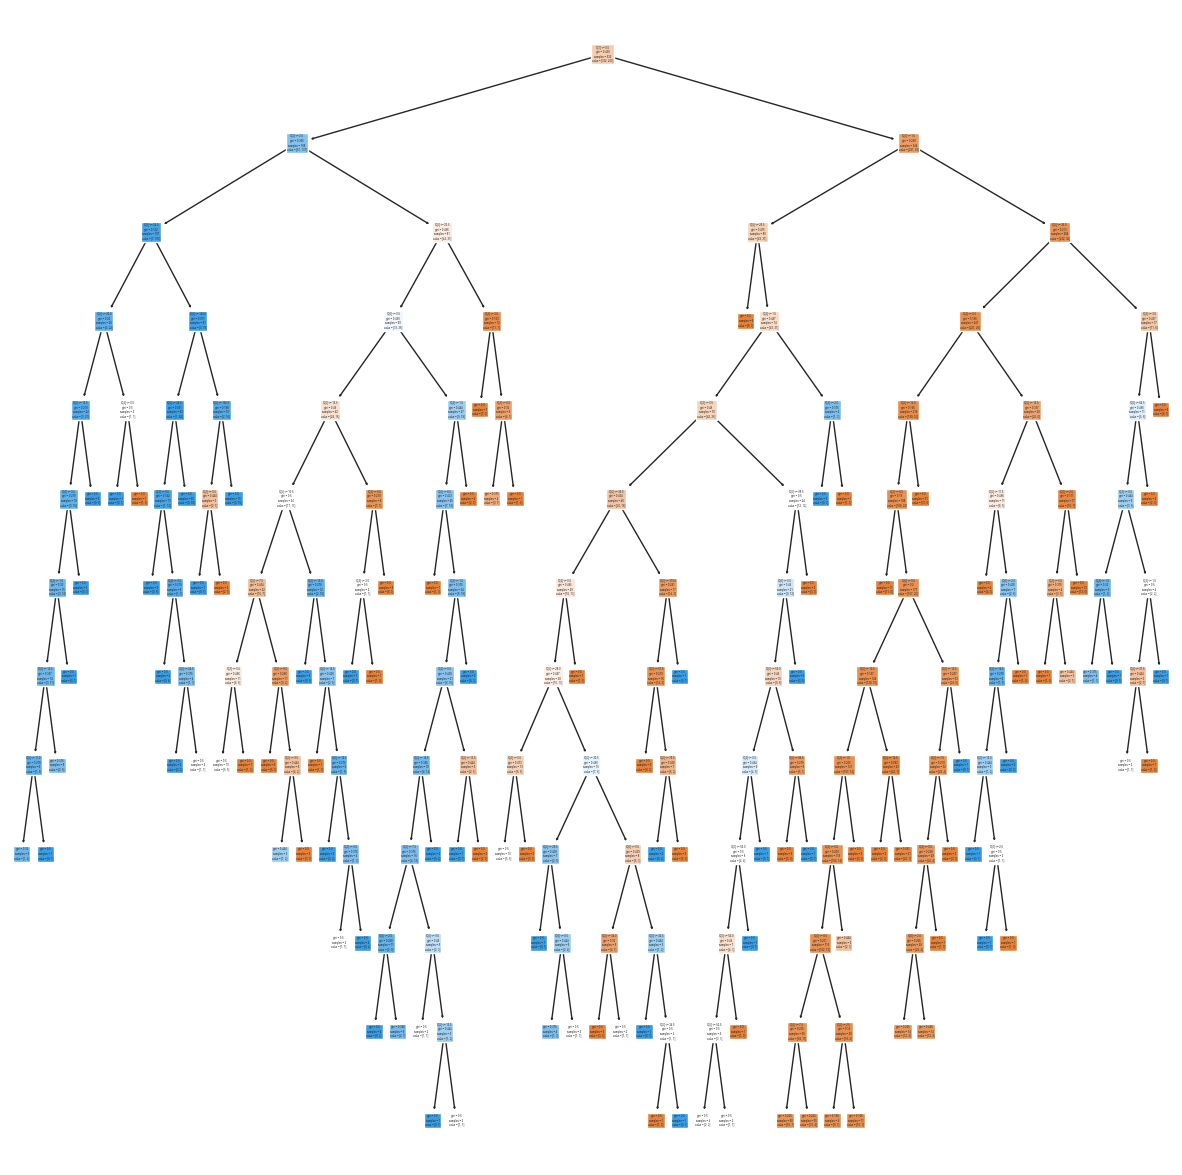

In [890]:
# Show the tree

plt.figure(figsize=(15,15))
tree.plot_tree(unpruned,filled=True)
plt.show()

In [891]:
# Accuracy on dev set
print("Accuracy without pruning:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)

Accuracy without pruning: 0.7611940298507462
At depth: 12


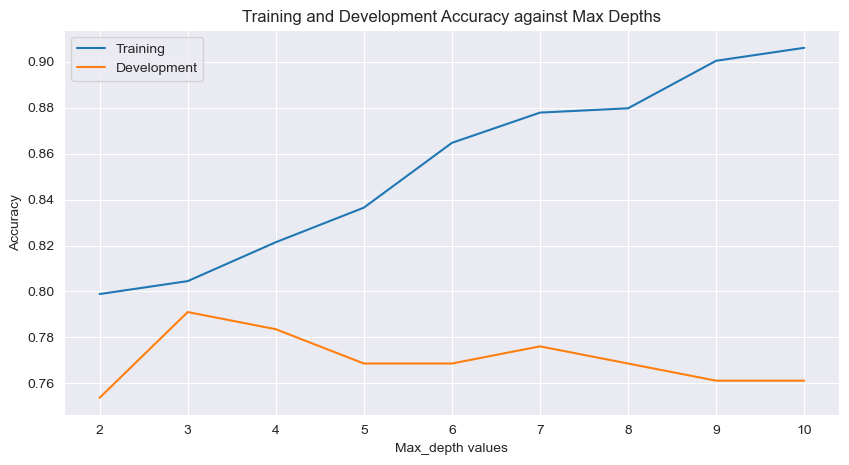

In [895]:
# looking at effect of pruning
pruned_depths = range(2, 11)

training_scores = []
dev_scores = []
for d in pruned_depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=r)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    training_scores.append(train_score)
    dev_score = clf.score(X_dev, y_dev)
    dev_scores.append(dev_score)

plt.figure(figsize=(10,5))
plt.plot(pruned_depths, training_scores, label = 'Training' )
plt.plot(pruned_depths, dev_scores, label = 'Development' )
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.title('Training and Development Accuracy against Max Depths')
plt.legend()
plt.show()

As we can see the Development line for Accuracy is showing a line that is overfitted where all the depths are plotted on the line of best fit. The Training line is showing a smooth and robust fit and you can see how the accuracy increaseds with each test.

In [896]:
# fitting the chosen tree
best_depth = pruned_depths[np.argmax(training_scores)]
print('Best performance reached at depth of:', best_depth)

pruned = DecisionTreeClassifier(max_depth=best_depth)
pruned.fit(X, y)

Best performance reached at depth of: 10


DecisionTreeClassifier(max_depth=10)

In [897]:
# training model with pruning
pruned = DecisionTreeClassifier(max_depth=10, random_state=r)
pruned.fit(X_train, y_train)

# Accuracy on y_test
print("Accuracy with pruning:", pruned.score(X_test, y_test))
print("At depth:", pruned.tree_.max_depth)

Accuracy with pruning: 0.7802690582959642
At depth: 10
